## Microsoft Movie Analysis 

In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import seaborn as sn
import matplotlib.pyplot as plt 

df= pd.read_csv('tn.movie_budgets.csv.gz')
df

### Imported The Data I Wished to Analyze

df= pd.read_csv('tn.movie_budgets.csv.gz') 
df

### Prepared the Budget Dataframe for Use
#### Cleaned it
#### Created net_pre_marketing to show the money made before marketing costs
#### Created earnings/cost_ratio to show how much it made compared to budget
#### Dropped all movies prior to 2010

In [3]:
budg= pd.read_csv('tn.movie_budgets.csv.gz')
budg['production_budget']=budg['production_budget'].str.replace(',','')
budg['domestic_gross']=budg['domestic_gross'].str.replace(',','')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace(',','')
budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')
#made sure the data was all integers in order for it to be able to sorted and analyzed
budg['net_pre_marketing']=budg['worldwide_gross']-budg['production_budget']
#made this column to indicate the best of my abilities the net profit
#it is unclear if advertising money is included(though i'm assuming it is not)
budg['domestic/world']=budg['domestic_gross']/budg['worldwide_gross']
#made this money to detirmine what percentage of worldwide earning were domestic
budg=budg.dropna()
budg['earnings/cost_ratio']=budg['net_pre_marketing']/budg['production_budget']
#this works as a percentage the movie recouperated its production budget
budg['year_released']=budg['release_date'].str[-4:].astype('int64')
#made a new column which has the year the film was released in order to be able to drop the movies made pre-2010
budg.drop(budg[budg['year_released'] < 2010].index, inplace = True)
budg.sort_values('earnings/cost_ratio').tail(25)

<ipython-input-3-3854280c5a05>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
<ipython-input-3-3854280c5a05>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
<ipython-input-3-3854280c5a05>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
5216,17,"Aug 23, 2013",You're Next,1000000,18494006,26887177,25887177,0.687837,25.887177,2013
4590,91,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,91627344,0.435322,26.179241,2018
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,0.575785,26.697820,2017
4258,59,"Oct 19, 2012",Paranormal Activity 4,5000000,53900335,142817992,137817992,0.377406,27.563598,2012
2996,97,"Nov 26, 2010",The Kingâs Speech,15000000,138797449,430821168,415821168,0.322170,27.721411,2010
4668,69,"Oct 12, 2012",Sinister,3000000,48086903,87727807,84727807,0.548138,28.242602,2012
4254,55,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,143806510,0.452056,28.761302,2016
4666,67,"Jun 7, 2013",The Purge,3000000,64473115,91266581,88266581,0.706426,29.422194,2013
5358,59,"Dec 30, 2011",Jodaeiye Nader az Simin,800000,7098492,24426169,23626169,0.290610,29.532711,2011
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,285154618,0.042055,30.016276,2016


### Created a Metric for Profitability
#### Profitability actually occurs at an e/c ratio of 1, but not going to take this out for fear of consequences

In [4]:
#"in a very broad sense movies haven't made any money until
#their box office roughly equals twice the money spent on production."
#https://www.fool.com/investing/2019/08/06/why-box-office-results-dont-really-explain-how-mov.aspx#:~:text=But%20it's%20important%20to%20remember,the%20movie%20but%20marketing%20it.
#I am going to use the budget data to detirmine if a movie is profitable
#I can do this by creating a column that tells me if a movies earnings/cost ration is above 1 or not
budgP=budg
budgP['Profitable?']= np.where(budgP['earnings/cost_ratio']>= 2, True, False)
budgP.sort_values('earnings/cost_ratio')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
5302,3,"Dec 11, 2015",American Hero,1000000,0,26,-999974,0.000000,-0.999974,2015,False
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,-6599172,1.000000,-0.999875,2010,False
3818,19,"May 8, 2015",Skin Trade,9000000,1242,1242,-8998758,1.000000,-0.999862,2015,False
5335,36,"Nov 21, 2014",Food Chains,913000,0,176,-912824,0.000000,-0.999807,2014,False
3161,62,"Sep 1, 2015",Broken Horses,15000000,0,3471,-14996529,0.000000,-0.999769,2015,False
...,...,...,...,...,...,...,...,...,...,...,...
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,0.477449,58.170677,2010,True
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,0.509439,63.364198,2015,True
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,0.540790,65.580591,2011,True
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,0.523420,100.759490,2012,True


### Imported Cleaned dataset for project usage

In [5]:
mega_table= pd.read_csv('Merge_mega_table.csv')
mega_table.sort_values('worldwide_gross')

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
136,247,tt1763303,6.9,62589.0,The First Time,2012,95.0,"Comedy,Drama,Romance",67.0,"Oct 19, 2012",2000000.0,17061.0,17061.0,-1982939.0,1.000000,-0.991470,2012.0,False
160,316,tt2059171,6.3,29550.0,13 Sins,2014,93.0,"Horror,Thriller",51.0,"Apr 18, 2014",4000000.0,9134.0,47552.0,-3952448.0,0.192084,-0.988112,2014.0,False
188,405,tt2398249,5.5,19832.0,They Came Together,2014,83.0,"Comedy,Romance",58.0,"Jun 27, 2014",3000000.0,0.0,82780.0,-2917220.0,0.000000,-0.972407,2014.0,False
249,586,tt4995790,7.2,44239.0,The Square,2017,151.0,"Comedy,Drama",100.0,"Oct 25, 2013",1500000.0,124244.0,176262.0,-1323738.0,0.704883,-0.882492,2013.0,False
36,53,tt1183923,7.0,22210.0,Welcome to the Rileys,2010,110.0,Drama,12.0,"Oct 29, 2010",10000000.0,152857.0,355919.0,-9644081.0,0.429471,-0.964408,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,432,tt2582846,7.7,315135.0,The Fault in Our Stars,2014,126.0,"Drama,Romance",43.0,"Jun 6, 2014",12000000.0,124872350.0,307166834.0,295166834.0,0.406529,24.597236,2014.0,True
21,28,tt0970866,5.5,99222.0,Little Fockers,2010,98.0,"Comedy,Romance",70.0,"Dec 22, 2010",100000000.0,148438600.0,310650574.0,210650574.0,0.477831,2.106506,2010.0,True
60,100,tt1343092,7.3,433165.0,The Great Gatsby,2013,143.0,"Drama,Romance",70.0,"May 10, 2013",190000000.0,144840419.0,351040419.0,161040419.0,0.412603,0.847581,2013.0,False
237,560,tt4465564,4.6,81706.0,Fifty Shades Darker,2017,118.0,"Drama,Romance",91.0,"Feb 10, 2017",55000000.0,114434010.0,381398492.0,326398492.0,0.300038,5.934518,2017.0,True


In [6]:
best_margin=mega_table.sort_values('earnings/cost_ratio', ascending=False).head(20)
best_margin.value_counts('genres')

genres
Horror,Thriller         6
Drama                   4
Drama,Romance           4
Comedy,Drama            2
Horror                  2
Comedy                  1
Comedy,Drama,Romance    1
dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

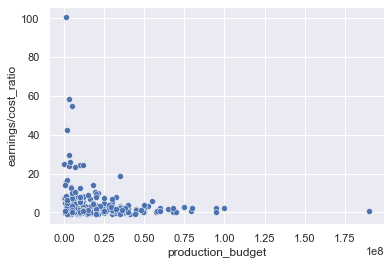

In [60]:
sn.scatterplot(data=mega_table, x="production_budget", y="earnings/cost_ratio")

In [61]:
mega_table2

NameError: name 'mega_table2' is not defined

In [62]:
mega_table2= pd.read_csv('Merge_mega_table2.csv')
most_exp=mega_table2.sort_values('production_budget', ascending = False).head(30)
best_margin=mega_table2.sort_values('earnings/cost_ratio', ascending = False).head(30)

<AxesSubplot:xlabel='earnings/cost_ratio', ylabel='production_budget'>

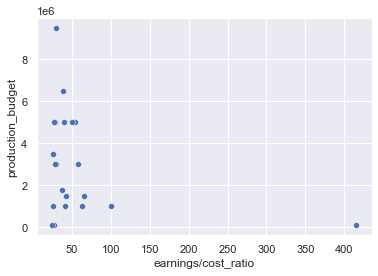

In [63]:
sn.scatterplot(data=best_margin, x="earnings/cost_ratio", y="production_budget")

In [64]:
#due to microsoft being a mjor player financially, it would make sense for their film budget to be similar to other feature films
#being so, I'm going to filter the movies in the dataset to movies that cost over $70 mil to make, which was described as the low end of a feature film
#https://parlaystudios.com/blog/feature-film-budget-breakdown/
feature_films=mega_table2.loc[mega_table2['production_budget']>=50000000]
#feature_films.drop_duplicates(subset=['movie'])
feature_films
#some of the movie values appear suspecct, but should not have a greater impact on entire df

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
2,34,tt0359950,7.30,275300.00,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",37.00,"Dec 25, 2013",91000000.00,58236838.00,187861183.00,96861183.00,0.31,1.06,2013.00,False
4,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
7,48,tt0398286,7.80,366366.00,Tangled,2010,100.00,"Adventure,Animation,Comedy",15.00,"Nov 24, 2010",260000000.00,200821936.00,586477240.00,326477240.00,0.34,1.26,2010.00,False
8,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
9,66,tt0427152,5.90,91546.00,Dinner for Schmucks,2010,114.00,Comedy,51.00,"Jul 30, 2010",69000000.00,73026337.00,86796502.00,17796502.00,0.84,0.26,2010.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,63522,tt8601408,8.40,32.00,Home,2018,71.00,"Drama,Romance,Thriller",44.00,"Mar 27, 2015",130000000.00,177397510.00,385997896.00,255997896.00,0.46,1.97,2015.00,False
1905,64122,tt8851190,8.10,26.00,Red,2018,90.00,Drama,63.00,"Oct 15, 2010",60000000.00,90380162.00,196439693.00,136439693.00,0.46,2.27,2010.00,True
1906,64262,tt8917752,6.50,430.00,Joy,2018,99.00,Drama,88.00,"Dec 25, 2015",60000000.00,56451232.00,101134059.00,41134059.00,0.56,0.69,2015.00,False
1909,64927,tt9225192,6.50,576.00,Unstoppable,2018,116.00,"Action,Crime",19.00,"Nov 12, 2010",95000000.00,81562942.00,165720921.00,70720921.00,0.49,0.74,2010.00,False


In [65]:
most_prev=feature_films.value_counts('genres').head(20)
top20=most_prev.index
most_prev.index

Index(['Adventure,Animation,Comedy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Action,Adventure,Drama',
       'Action,Adventure,Comedy', 'Action,Adventure,Animation', 'Comedy',
       'Drama', 'Adventure,Family,Fantasy', 'Action,Adventure,Thriller',
       'Documentary', 'Action,Crime,Thriller', 'Action,Comedy,Crime',
       'Action,Thriller', 'Action,Drama,Thriller', 'Adventure,Comedy,Family',
       'Action,Drama,Sci-Fi', 'Thriller', 'Action,Adventure,Family',
       'Crime,Drama,Mystery'],
      dtype='object', name='genres')

In [66]:
feature_top20=feature_films.loc[feature_films['genres'].isin(top20)]
genre_dict=dict(feature_top20.groupby('genres').net_pre_marketing.mean())
sort_genre_mean = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted=dict(sort_genre_mean)

In [67]:
feature_top20

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
4,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
7,48,tt0398286,7.80,366366.00,Tangled,2010,100.00,"Adventure,Animation,Comedy",15.00,"Nov 24, 2010",260000000.00,200821936.00,586477240.00,326477240.00,0.34,1.26,2010.00,False
8,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
9,66,tt0427152,5.90,91546.00,Dinner for Schmucks,2010,114.00,Comedy,51.00,"Jul 30, 2010",69000000.00,73026337.00,86796502.00,17796502.00,0.84,0.26,2010.00,False
10,68,tt0429493,6.80,235256.00,The A-Team,2010,117.00,"Action,Adventure,Thriller",32.00,"Jun 11, 2010",110000000.00,77222099.00,177241171.00,67241171.00,0.44,0.61,2010.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,60229,tt7535780,6.50,24.00,The Great Wall,2017,72.00,Documentary,92.00,"Feb 17, 2017",150000000.00,45157105.00,334486852.00,184486852.00,0.14,1.23,2017.00,False
1885,60984,tt7728220,6.30,7.00,Tomorrowland,2017,70.00,Documentary,23.00,"May 22, 2015",170000000.00,93436322.00,206627518.00,36627518.00,0.45,0.22,2015.00,False
1905,64122,tt8851190,8.10,26.00,Red,2018,90.00,Drama,63.00,"Oct 15, 2010",60000000.00,90380162.00,196439693.00,136439693.00,0.46,2.27,2010.00,True
1906,64262,tt8917752,6.50,430.00,Joy,2018,99.00,Drama,88.00,"Dec 25, 2015",60000000.00,56451232.00,101134059.00,41134059.00,0.56,0.69,2015.00,False


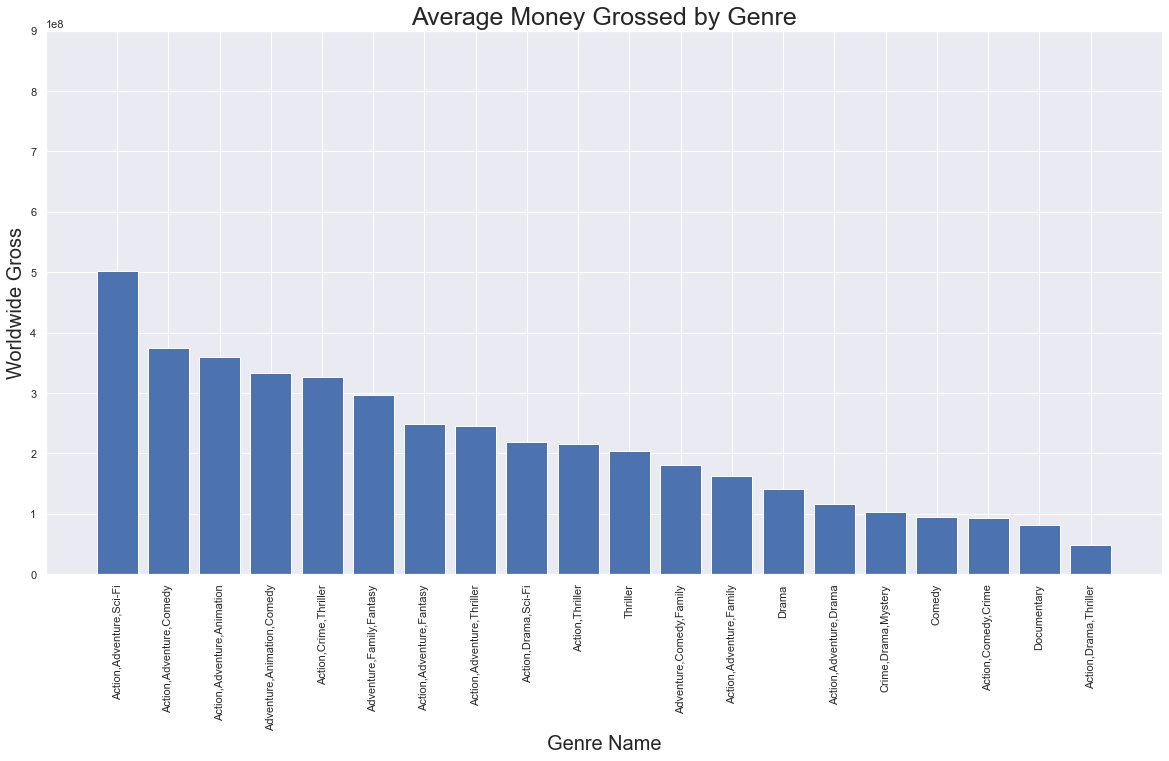

In [174]:
x = genre_mean_sorted.keys()
y = genre_mean_sorted.values()
plot_one_fig, plot_one_ax= plt.subplots(figsize=(20, 10))
plot_one_ax.set_title('Average Money Grossed by Genre', fontsize=25)
plot_one_ax.set_ylabel('Worldwide Gross', fontsize=20)
plot_one_ax.set_xlabel('Genre Name', fontsize=20)
plot_one_ax.bar(x,y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000000000, 100000000));


In [69]:
actadvensci=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Sci-Fi']
actadvensci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 4 to 1841
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           50 non-null     int64  
 1   tconst               50 non-null     object 
 2   averagerating        50 non-null     float64
 3   numvotes             50 non-null     float64
 4   movie                50 non-null     object 
 5   start_year           50 non-null     int64  
 6   runtime_minutes      50 non-null     float64
 7   genres               50 non-null     object 
 8   id                   50 non-null     float64
 9   release_date         50 non-null     object 
 10  production_budget    50 non-null     float64
 11  domestic_gross       50 non-null     float64
 12  worldwide_gross      50 non-null     float64
 13  net_pre_marketing    50 non-null     float64
 14  domestic/world       50 non-null     float64
 15  earnings/cost_ratio  50 non-null     flo

In [70]:
actadvencom=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Comedy']
actadvencom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 19 to 1744
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           18 non-null     int64  
 1   tconst               18 non-null     object 
 2   averagerating        18 non-null     float64
 3   numvotes             18 non-null     float64
 4   movie                18 non-null     object 
 5   start_year           18 non-null     int64  
 6   runtime_minutes      18 non-null     float64
 7   genres               18 non-null     object 
 8   id                   18 non-null     float64
 9   release_date         18 non-null     object 
 10  production_budget    18 non-null     float64
 11  domestic_gross       18 non-null     float64
 12  worldwide_gross      18 non-null     float64
 13  net_pre_marketing    18 non-null     float64
 14  domestic/world       18 non-null     float64
 15  earnings/cost_ratio  18 non-null     fl

In [71]:
actadvenani=feature_top20.loc[feature_top20['genres']== 'Action,Adventure,Animation']
actadvenani.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 20 to 1601
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15 non-null     int64  
 1   tconst               15 non-null     object 
 2   averagerating        15 non-null     float64
 3   numvotes             15 non-null     float64
 4   movie                15 non-null     object 
 5   start_year           15 non-null     int64  
 6   runtime_minutes      15 non-null     float64
 7   genres               15 non-null     object 
 8   id                   15 non-null     float64
 9   release_date         15 non-null     object 
 10  production_budget    15 non-null     float64
 11  domestic_gross       15 non-null     float64
 12  worldwide_gross      15 non-null     float64
 13  net_pre_marketing    15 non-null     float64
 14  domestic/world       15 non-null     float64
 15  earnings/cost_ratio  15 non-null     fl

In [72]:
feature_top20['month_released']=feature_top20['release_date'].str[:3]


<ipython-input-72-b04bc0a7de21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_top20['month_released']=feature_top20['release_date'].str[:3]


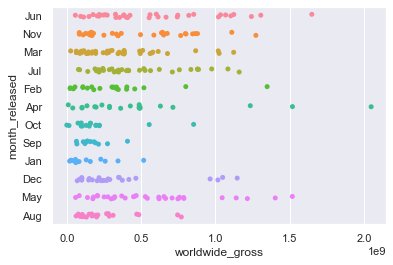

In [73]:
ax = sn.stripplot(x="worldwide_gross", y="month_released", data=feature_top20)

In [74]:
mega_table2['month_released']=mega_table2['release_date'].str[:3]
period1=['Jan','Feb','Mar','Apr']
period_1=mega_table2.loc[mega_table2['month_released'].isin(period1)]
period2=['May','Jun','Jul','Aug']
period_2=mega_table2.loc[mega_table2['month_released'].isin(period2)]
period3=['Sep','Oct','Nov','Dec']
period_3=mega_table2.loc[mega_table2['month_released'].isin(period3)]

In [75]:
period_1[period_1['numvotes']>= 10000]

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1,30,tt0337692,6.10,37886.00,On the Road,2012,124.00,"Adventure,Drama,Romance",17.00,"Mar 22, 2013",25000000.00,720828.00,9313302.00,-15686698.00,0.08,-0.63,2013.00,False,Mar
6,45,tt0383010,5.10,28570.00,The Three Stooges,2012,92.00,"Comedy,Family",4.00,"Apr 13, 2012",30000000.00,44338224.00,54052249.00,24052249.00,0.82,0.80,2012.00,False,Apr
8,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False,Mar
15,78,tt0437086,7.50,88207.00,Alita: Battle Angel,2019,122.00,"Action,Adventure,Sci-Fi",24.00,"Feb 14, 2019",170000000.00,85710210.00,402976036.00,232976036.00,0.21,1.37,2019.00,False,Feb
19,89,tt0448115,7.40,109051.00,Shazam!,2019,132.00,"Action,Adventure,Comedy",97.00,"Apr 5, 2019",85000000.00,139606856.00,362899733.00,277899733.00,0.38,3.27,2019.00,True,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,57280,tt6857112,7.10,102511.00,Us,2019,116.00,"Horror,Mystery,Thriller",88.00,"Mar 22, 2019",20000000.00,175006930.00,254210310.00,234210310.00,0.69,11.71,2019.00,True,Mar
1870,58547,tt7153766,6.40,32049.00,Unsane,2018,98.00,"Drama,Horror,Mystery",70.00,"Mar 23, 2018",1500000.00,7690044.00,14244931.00,12744931.00,0.54,8.50,2018.00,True,Mar
1883,60647,tt7634968,4.90,10141.00,What Men Want,2019,117.00,"Comedy,Fantasy,Romance",21.00,"Feb 8, 2019",20000000.00,54611903.00,69911903.00,49911903.00,0.78,2.50,2019.00,True,Feb
1892,61789,tt7961060,8.00,16465.00,Dragon Ball Super: Broly,2018,100.00,"Action,Adventure,Animation",36.00,"Jan 16, 2019",8500000.00,30376755.00,122747755.00,114247755.00,0.25,13.44,2019.00,True,Jan


In [76]:
period_2[period_2['numvotes']>= 10000]
p2genres=period_2.value_counts('genres').head(20)
p2mostprev=p2genres.index
period_2_top_genres=period_2.loc[period_2['genres'].isin(p2mostprev)]

In [77]:
period_3[period_3['numvotes']>= 10000]

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
2,34,tt0359950,7.30,275300.00,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama",37.00,"Dec 25, 2013",91000000.00,58236838.00,187861183.00,96861183.00,0.31,1.06,2013.00,False,Dec
3,38,tt0365907,6.50,105116.00,A Walk Among the Tombstones,2014,114.00,"Action,Crime,Drama",67.00,"Sep 19, 2014",28000000.00,26017685.00,62108587.00,34108587.00,0.42,1.22,2014.00,False,Sep
5,41,tt0376136,6.20,94787.00,The Rum Diary,2011,119.00,"Comedy,Drama",16.00,"Oct 28, 2011",45000000.00,13109815.00,21544732.00,-23455268.00,0.61,-0.52,2011.00,False,Oct
7,48,tt0398286,7.80,366366.00,Tangled,2010,100.00,"Adventure,Animation,Comedy",15.00,"Nov 24, 2010",260000000.00,200821936.00,586477240.00,326477240.00,0.34,1.26,2010.00,False,Nov
12,72,tt0433035,7.10,283534.00,Real Steel,2011,127.00,"Action,Drama,Family",31.00,"Oct 7, 2011",110000000.00,85463309.00,263880341.00,153880341.00,0.32,1.40,2011.00,False,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,58423,tt7125860,7.20,25512.00,If Beale Street Could Talk,2018,119.00,"Drama,Romance",96.00,"Dec 14, 2018",12000000.00,14915773.00,19859167.00,7859167.00,0.75,0.65,2018.00,False,Dec
1868,58481,tt7137380,6.20,13683.00,Destroyer,2018,121.00,"Action,Crime,Drama",5.00,"Dec 25, 2018",9000000.00,1533324.00,3681096.00,-5318904.00,0.42,-0.59,2018.00,False,Dec
1878,59653,tt7401588,7.40,46728.00,Instant Family,2018,118.00,"Comedy,Drama",20.00,"Nov 16, 2018",48000000.00,67363237.00,119736188.00,71736188.00,0.56,1.49,2018.00,False,Nov
1891,61775,tt7959026,7.10,58955.00,The Mule,2018,116.00,"Crime,Drama,Thriller",100.00,"Dec 14, 2018",50000000.00,103804407.00,170857676.00,120857676.00,0.61,2.42,2018.00,True,Dec


<AxesSubplot:xlabel='averagerating', ylabel='worldwide_gross'>

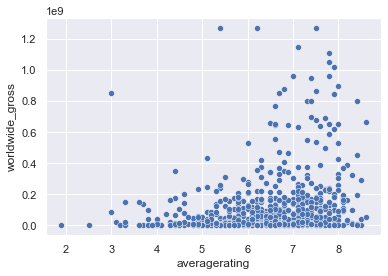

In [78]:
sn.scatterplot(data=period_3, x="averagerating", y="worldwide_gross")

In [79]:
period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]

<ipython-input-79-80650c671d28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2_top_genres['ec_ratio']=period_2_top_genres["earnings/cost_ratio"]


In [80]:
period_2_top_genres.sort_values('ec_ratio')
period_2_top_genres = period_2_top_genres.drop(1119)

In [81]:
period_2_top_genres.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,ec_ratio
count,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00,320.00
mean,18599.57,6.38,132210.40,2013.80,104.91,50.95,61416006.62,79478969.99,208305675.08,146889668.46,0.50,2.71,2013.93,2.71
std,17940.71,1.00,200501.50,2.63,19.64,28.55,74516989.52,108656594.57,304273072.84,250745663.02,0.29,5.10,2.51,5.10
min,39.00,2.40,5.00,2010.00,40.00,2.00,50000.00,0.00,1242.00,-200237650.00,0.00,-1.00,2010.00,-1.00
25%,2813.75,5.80,4593.50,2011.00,91.75,27.00,7000000.00,1758242.00,7419838.50,34311.50,0.30,0.01,2012.00,0.01
50%,13132.50,6.40,60120.50,2014.00,103.00,51.00,25500000.00,40745722.50,70652284.00,41148458.50,0.44,1.26,2014.00,1.26
75%,29716.50,7.10,175818.00,2016.00,117.00,76.00,100000000.00,106071826.50,281991084.50,180903694.00,0.74,3.27,2016.00,3.27
max,65704.00,9.20,1841066.00,2019.00,165.00,100.00,410600000.00,652270625.00,1648854864.00,1433854864.00,1.00,41.41,2019.00,41.41


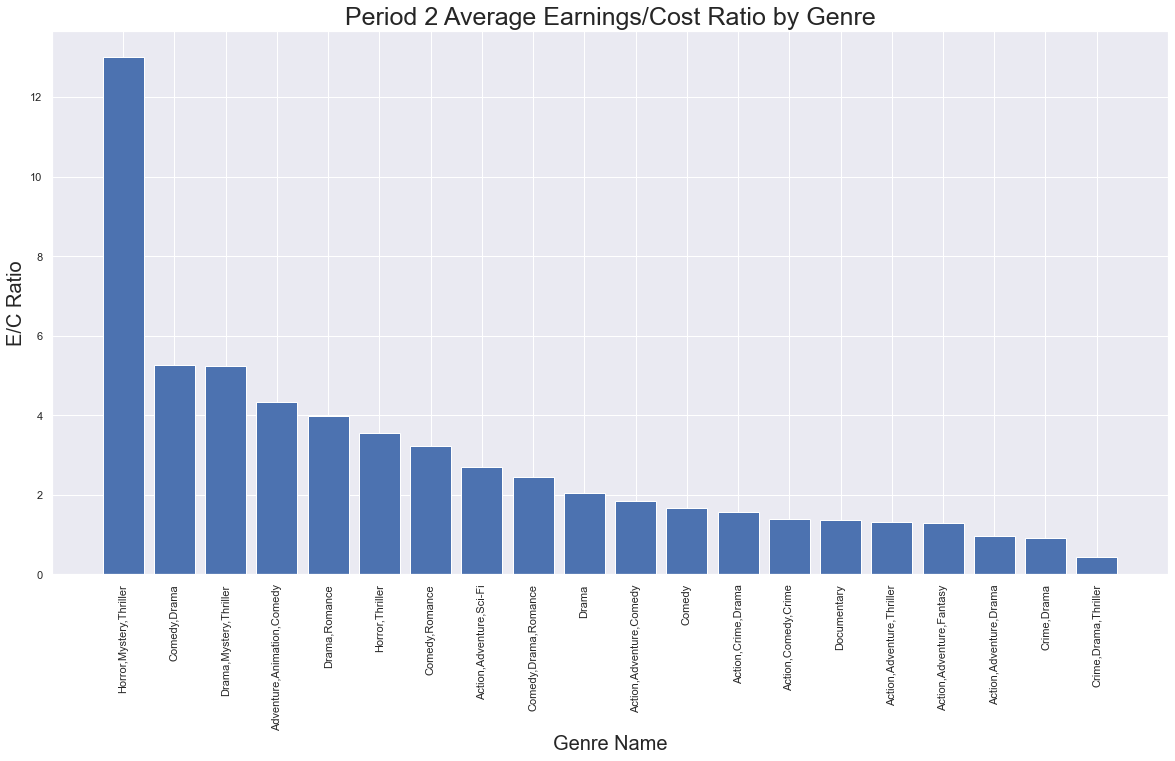

In [175]:

genre_dict2=dict(period_2_top_genres.groupby('genres').ec_ratio.mean())
sort_genre_mean2 = sorted(genre_dict2.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2=dict(sort_genre_mean2)
genre_mean_sorted2
plot_two, plot_two_ax= plt.subplots(figsize=(20, 10))
plot_two_ax.bar(genre_mean_sorted2.keys(),genre_mean_sorted2.values())
plot_two_ax.set_title('Period 2 Average Earnings/Cost Ratio by Genre', fontsize=25)
plot_two_ax.set_ylabel('E/C Ratio', fontsize=20)
plot_two_ax.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

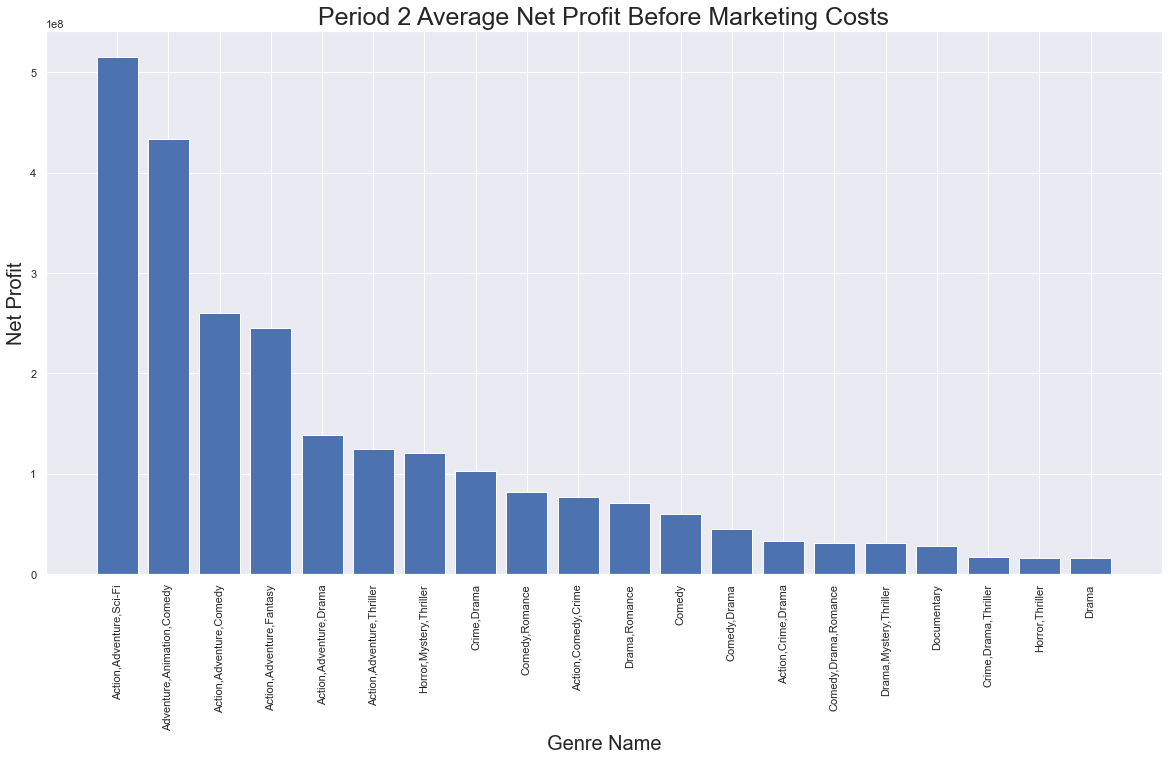

In [176]:
genre_dict2_=dict(period_2_top_genres.groupby('genres').net_pre_marketing.mean())
sort_genre_mean2_ = sorted(genre_dict2_.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2_=dict(sort_genre_mean2_)
genre_mean_sorted2_
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2_.keys(),genre_mean_sorted2_.values())
plot_two_ax_.set_title('Period 2 Average Net Profit Before Marketing Costs', fontsize=25)
plot_two_ax_.set_ylabel('Net Profit', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

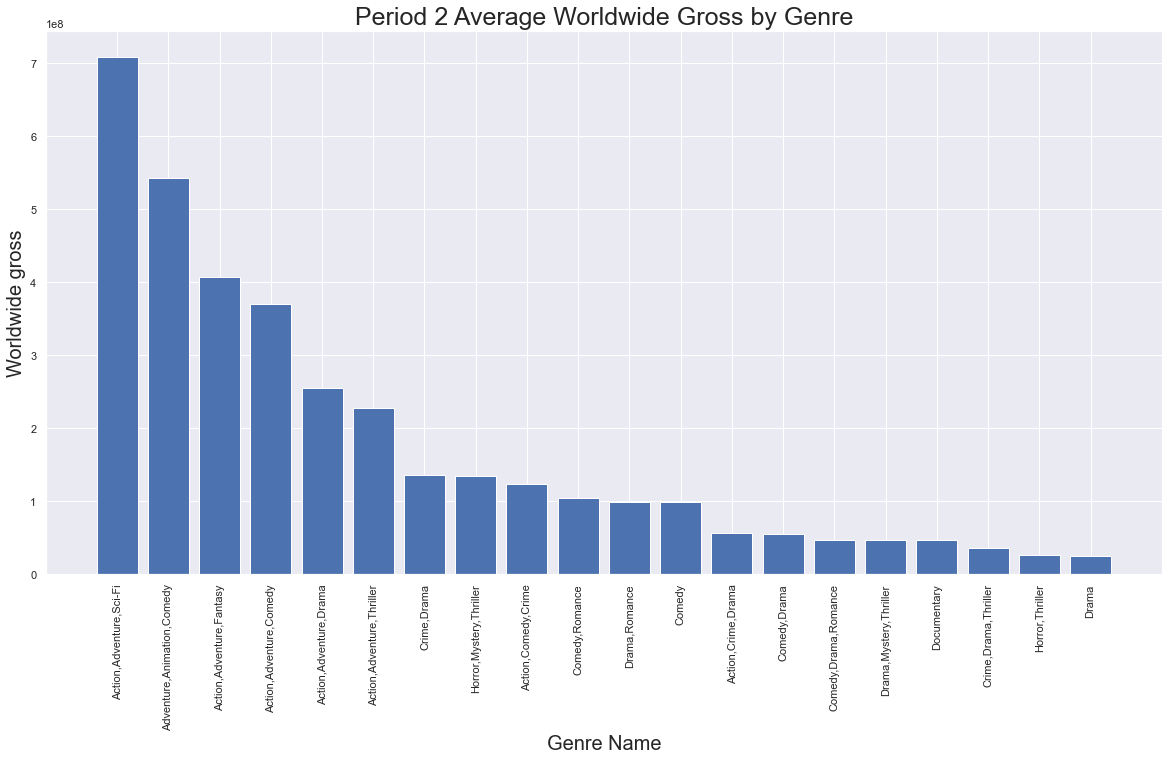

In [177]:
genre_dict2__=dict(period_2_top_genres.groupby('genres').worldwide_gross.mean())
sort_genre_mean2__ = sorted(genre_dict2__.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2__=dict(sort_genre_mean2__)
genre_mean_sorted2__
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(genre_mean_sorted2__.keys(),genre_mean_sorted2__.values())
plot_two_ax_.set_title('Period 2 Average Worldwide Gross by Genre', fontsize=25)
plot_two_ax_.set_ylabel('Worldwide gross', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)
plt.xticks(rotation=90);

In [125]:
top20_genres=mega_table2.value_counts('genres').head(20)
top20_genres

genres
Drama                         131
Adventure,Animation,Comedy     69
Comedy,Drama                   65
Comedy                         63
Documentary                    62
Comedy,Drama,Romance           62
Action,Adventure,Sci-Fi        53
Drama,Romance                  52
Comedy,Romance                 47
Action,Crime,Drama             43
Action,Adventure,Fantasy       35
Horror,Mystery,Thriller        35
Action,Comedy,Crime            32
Horror,Thriller                31
Crime,Drama,Thriller           30
Drama,Thriller                 30
Action,Adventure,Drama         29
Horror                         28
Biography,Drama,History        26
Action,Crime,Thriller          24
dtype: int64

In [86]:
mega=mega_table2.loc[mega_table2['production_budget']>=50000000]

In [87]:
mega_table2_votes=mega_table2[mega_table2['numvotes']>= 10000]

In [88]:
mega_table2_votes5=mega_table2[mega_table2['numvotes']>= 1000]

In [89]:
mega_table2_votes50=mega_table2_votes.sort_values('worldwide_gross', ascending=False).head(50)

[Text(0.5, 1.0, 'Rating vs World Wide Gross')]

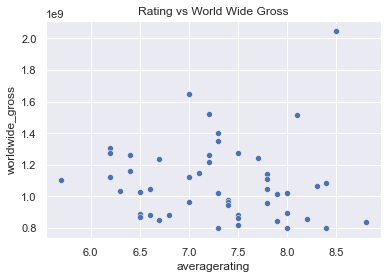

In [128]:
sn.scatterplot(data=mega_table2_votes50, x="averagerating", y="worldwide_gross").set(title='Rating vs World Wide Gross')

In [91]:
mega_table2_horrormt=mega_table2_votes5.loc[mega_table2_votes5['genres']=='Horror,Mystery,Thriller']
mega_table2_horrormt.sort_values('averagerating')

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?,month_released
1765,50359,tt5690360,3.20,19650.00,Slender Man,2018,93.00,"Horror,Mystery,Thriller",80.00,"Aug 10, 2018",10000000.00,30564825.00,51723644.00,41723644.00,0.59,4.17,2018.00,True,Aug
1298,25910,tt2752758,4.10,15502.00,Devil's Due,2014,89.00,"Horror,Mystery,Thriller",14.00,"Jan 17, 2014",7000000.00,15821461.00,36146087.00,29146087.00,0.44,4.16,2014.00,True,Jan
1119,19889,tt2309260,4.20,17763.00,The Gallows,2015,81.00,"Horror,Mystery,Thriller",80.00,"Jul 10, 2015",100000.00,22764410.00,41656474.00,41556474.00,0.55,415.56,2015.00,True,Jul
224,1144,tt1204977,4.50,44054.00,Ouija,2014,89.00,"Horror,Mystery,Thriller",60.00,"Oct 24, 2014",5000000.00,50856010.00,103300632.00,98300632.00,0.49,19.66,2014.00,True,Oct
903,12668,tt1945044,4.50,5156.00,Exeter,2015,91.00,"Horror,Mystery,Thriller",49.00,"Sep 1, 2015",25000.00,0.00,489792.00,464792.00,0.00,18.59,2015.00,True,Sep
1214,23081,tt2473510,4.60,22361.00,Paranormal Activity: The Ghost Dimension,2015,88.00,"Horror,Mystery,Thriller",7.00,"Oct 23, 2015",10000000.00,18297124.00,77959374.00,67959374.00,0.23,6.80,2015.00,True,Oct
1007,15959,tt2109184,4.60,58408.00,Paranormal Activity 4,2012,88.00,"Horror,Mystery,Thriller",59.00,"Oct 19, 2012",5000000.00,53900335.00,142817992.00,137817992.00,0.38,27.56,2012.00,True,Oct
1434,32087,tt3387542,4.80,36423.00,The Forest,2016,93.00,"Horror,Mystery,Thriller",92.00,"Jan 8, 2016",10000000.00,26594261.00,40749230.00,30749230.00,0.65,3.07,2016.00,True,Jan
90,315,tt0872230,4.80,18381.00,My Soul to Take,2010,107.00,"Horror,Mystery,Thriller",68.00,"Oct 8, 2010",25000000.00,14744435.00,16727470.00,-8272530.00,0.88,-0.33,2010.00,False,Oct
540,3787,tt1540011,5.00,36867.00,Blair Witch,2016,89.00,"Horror,Mystery,Thriller",1.00,"Sep 16, 2016",10000000.00,20777061.00,38985577.00,28985577.00,0.53,2.90,2016.00,True,Sep


<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

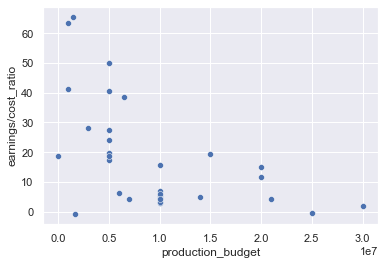

In [92]:
mega_table2_horrormt=mega_table2_horrormt.drop(1119)
sn.scatterplot(data=mega_table2_horrormt, x="production_budget", y="earnings/cost_ratio")

In [93]:
mega_table2_horrormt.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,24513.06,5.61,86980.90,2014.68,95.55,54.23,9280161.29,52613219.52,109404748.71,100124587.42,0.47,18.31,2014.77
std,18504.48,1.03,99406.56,2.69,10.47,27.23,7383524.51,45010059.08,87949885.36,86538070.54,0.18,18.27,2.68
min,70.00,3.20,1115.00,2010.00,80.00,1.00,25000.00,0.00,80745.00,-8272530.00,0.00,-0.95,2010.00
25%,6911.50,4.90,35447.50,2012.50,88.00,41.00,5000000.00,23685661.00,47254515.50,41567682.50,0.37,4.31,2012.50
50%,23089.00,5.60,58408.00,2015.00,93.00,59.00,7000000.00,35819556.00,87727807.00,68925064.00,0.50,14.90,2015.00
75%,39960.50,6.20,96430.50,2017.00,103.00,70.50,10000000.00,60444975.00,133914126.00,128914126.00,0.54,25.78,2017.00
max,57280.00,7.70,400474.00,2019.00,118.00,93.00,30000000.00,176040665.00,318000141.00,298000141.00,0.88,65.58,2019.00


In [94]:
actiontableau=pd.read_csv('action_table.csv')
actiontableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
1,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
2,68,tt0429493,6.80,235256.00,The A-Team,2010,117.00,"Action,Adventure,Thriller",32.00,"Jun 11, 2010",110000000.00,77222099.00,177241171.00,67241171.00,0.44,0.61,2010.00,False
3,72,tt0433035,7.10,283534.00,Real Steel,2011,127.00,"Action,Drama,Family",31.00,"Oct 7, 2011",110000000.00,85463309.00,263880341.00,153880341.00,0.32,1.40,2011.00,True
4,78,tt0437086,7.50,88207.00,Alita: Battle Angel,2019,122.00,"Action,Adventure,Sci-Fi",24.00,"Feb 14, 2019",170000000.00,85710210.00,402976036.00,232976036.00,0.21,1.37,2019.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45547,tt5013056,7.90,466580.00,Dunkirk,2017,106.00,"Action,Drama,History",69.00,"Jul 21, 2017",150000000.00,190068280.00,499837368.00,349837368.00,0.38,2.33,2017.00,True
194,46167,tt5095030,7.10,244024.00,Ant-Man and the Wasp,2018,118.00,"Action,Adventure,Comedy",41.00,"Jul 6, 2018",130000000.00,216648740.00,623144660.00,493144660.00,0.35,3.79,2018.00,True
195,48760,tt5463162,7.80,391735.00,Deadpool 2,2018,119.00,"Action,Adventure,Comedy",15.00,"May 18, 2018",110000000.00,324591735.00,786680557.00,676680557.00,0.41,6.15,2018.00,True
196,50822,tt5758778,5.80,81193.00,Skyscraper,2018,102.00,"Action,Adventure,Thriller",78.00,"Jul 13, 2018",125000000.00,68420120.00,304115534.00,179115534.00,0.22,1.43,2018.00,True


In [95]:
horrortableau=pd.read_csv('horror_table.csv')
horrortableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,70,tt0431021,5.90,53649.00,The Possession,2012,92.00,"Horror,Mystery,Thriller",81.00,"Aug 31, 2012",14000000.00,49130588.00,82925064.00,68925064.00,0.59,4.92,2012.00,True
1,102,tt0455407,6.50,104465.00,The Crazies,2010,101.00,"Horror,Thriller",36.00,"Feb 26, 2010",19000000.00,39123589.00,56445534.00,37445534.00,0.69,1.97,2010.00,True
2,122,tt0464154,5.40,81327.00,Piranha 3D,2010,88.00,"Comedy,Horror",52.00,"Aug 20, 2010",24000000.00,25003155.00,83660160.00,59660160.00,0.30,2.49,2010.00,True
3,177,tt0498381,4.50,34151.00,Rings,2017,102.00,"Drama,Horror,Mystery",38.00,"Feb 3, 2017",25000000.00,27793018.00,82917283.00,57917283.00,0.34,2.32,2017.00,True
4,203,tt0780653,5.80,97873.00,The Wolfman,2010,103.00,"Drama,Fantasy,Horror",91.00,"Feb 12, 2010",150000000.00,62189884.00,142634358.00,-7365642.00,0.44,-0.05,2010.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,57280,tt6857112,7.10,102511.00,Us,2019,116.00,"Horror,Mystery,Thriller",88.00,"Mar 22, 2019",20000000.00,175006930.00,254210310.00,234210310.00,0.69,11.71,2019.00,True
158,57914,tt6998518,6.60,44378.00,Mandy,2018,121.00,"Action,Fantasy,Horror",71.00,"Sep 14, 2018",6000000.00,1214525.00,1427656.00,-4572344.00,0.85,-0.76,2018.00,False
159,58547,tt7153766,6.40,32049.00,Unsane,2018,98.00,"Drama,Horror,Mystery",70.00,"Mar 23, 2018",1500000.00,7690044.00,14244931.00,12744931.00,0.54,8.50,2018.00,True
160,61203,tt7784604,7.30,151571.00,Hereditary,2018,127.00,"Drama,Horror,Mystery",56.00,"Jun 8, 2018",10000000.00,44069456.00,70133905.00,60133905.00,0.63,6.01,2018.00,True


In [96]:
len(horrortableau)

162

In [97]:
horrorover3mil=horrortableau.loc[horrortableau['production_budget']>=3000000]
horrorover3mil

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,70,tt0431021,5.90,53649.00,The Possession,2012,92.00,"Horror,Mystery,Thriller",81.00,"Aug 31, 2012",14000000.00,49130588.00,82925064.00,68925064.00,0.59,4.92,2012.00,True
1,102,tt0455407,6.50,104465.00,The Crazies,2010,101.00,"Horror,Thriller",36.00,"Feb 26, 2010",19000000.00,39123589.00,56445534.00,37445534.00,0.69,1.97,2010.00,True
2,122,tt0464154,5.40,81327.00,Piranha 3D,2010,88.00,"Comedy,Horror",52.00,"Aug 20, 2010",24000000.00,25003155.00,83660160.00,59660160.00,0.30,2.49,2010.00,True
3,177,tt0498381,4.50,34151.00,Rings,2017,102.00,"Drama,Horror,Mystery",38.00,"Feb 3, 2017",25000000.00,27793018.00,82917283.00,57917283.00,0.34,2.32,2017.00,True
4,203,tt0780653,5.80,97873.00,The Wolfman,2010,103.00,"Drama,Fantasy,Horror",91.00,"Feb 12, 2010",150000000.00,62189884.00,142634358.00,-7365642.00,0.44,-0.05,2010.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,56894,tt6772950,5.20,33621.00,Truth or Dare,2018,100.00,"Horror,Thriller",91.00,"Apr 13, 2018",3500000.00,41411015.00,95127344.00,91627344.00,0.44,26.18,2018.00,True
157,57280,tt6857112,7.10,102511.00,Us,2019,116.00,"Horror,Mystery,Thriller",88.00,"Mar 22, 2019",20000000.00,175006930.00,254210310.00,234210310.00,0.69,11.71,2019.00,True
158,57914,tt6998518,6.60,44378.00,Mandy,2018,121.00,"Action,Fantasy,Horror",71.00,"Sep 14, 2018",6000000.00,1214525.00,1427656.00,-4572344.00,0.85,-0.76,2018.00,False
160,61203,tt7784604,7.30,151571.00,Hereditary,2018,127.00,"Drama,Horror,Mystery",56.00,"Jun 8, 2018",10000000.00,44069456.00,70133905.00,60133905.00,0.63,6.01,2018.00,True


In [98]:
horrortableau=horrortableau.round(decimals=3)
horrortableau.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00
mean,18132.59,5.87,85252.59,2013.91,98.89,51.99,18616790.12,35387515.15,79158339.41,60541549.28,0.46,10.48,2014.07
std,17741.03,0.83,85637.14,2.66,11.73,27.36,29139949.60,45224321.85,104795979.93,91961269.03,0.25,35.25,2.61
min,70.00,3.20,10217.00,2010.00,80.00,1.00,70000.00,0.00,7556.00,-12965385.00,0.00,-1.00,2010.00
25%,2828.25,5.30,33381.75,2011.25,91.00,31.25,4000000.00,3717054.00,11431361.75,159143.75,0.33,0.04,2012.00
50%,11348.50,5.90,57796.00,2014.00,97.00,54.50,9450000.00,24717313.50,43587448.50,29065832.00,0.49,2.31,2014.00
75%,31712.50,6.40,106295.75,2016.00,105.00,73.75,20000000.00,47921458.50,99572618.50,85023157.75,0.63,8.41,2016.00
max,62412.00,7.70,553751.00,2019.00,152.00,100.00,190000000.00,327481748.00,697457969.00,662457969.00,1.00,415.56,2019.00


In [99]:
totalhorroroverbudget=len(horrorover3mil['movie'])
totalhorroroverbudget

136

In [100]:
pd.options.display.float_format='{:.2f}'.format


In [101]:
horrortableau.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00,162.00
mean,18132.59,5.87,85252.59,2013.91,98.89,51.99,18616790.12,35387515.15,79158339.41,60541549.28,0.46,10.48,2014.07
std,17741.03,0.83,85637.14,2.66,11.73,27.36,29139949.60,45224321.85,104795979.93,91961269.03,0.25,35.25,2.61
min,70.00,3.20,10217.00,2010.00,80.00,1.00,70000.00,0.00,7556.00,-12965385.00,0.00,-1.00,2010.00
25%,2828.25,5.30,33381.75,2011.25,91.00,31.25,4000000.00,3717054.00,11431361.75,159143.75,0.33,0.04,2012.00
50%,11348.50,5.90,57796.00,2014.00,97.00,54.50,9450000.00,24717313.50,43587448.50,29065832.00,0.49,2.31,2014.00
75%,31712.50,6.40,106295.75,2016.00,105.00,73.75,20000000.00,47921458.50,99572618.50,85023157.75,0.63,8.41,2016.00
max,62412.00,7.70,553751.00,2019.00,152.00,100.00,190000000.00,327481748.00,697457969.00,662457969.00,1.00,415.56,2019.00


In [102]:
totalhorroroverbudgetsuccess=len(horrorover3mil.loc[horrorover3mil['earnings/cost_ratio']>=1])

In [103]:
totalhorroroverbudgetsuccess/totalhorroroverbudget

0.6323529411764706

In [104]:
horrorover3mil['movie' and'earnings/cost_ratio']

0      4.92
1      1.97
2      2.49
3      2.32
4     -0.05
       ... 
156   26.18
157   11.71
158   -0.76
160    6.01
161    6.13
Name: earnings/cost_ratio, Length: 136, dtype: float64

<AxesSubplot:xlabel='production_budget', ylabel='earnings/cost_ratio'>

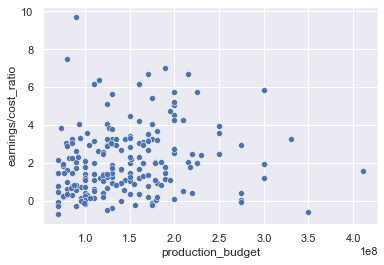

In [105]:
sn.scatterplot(data=actiontableau, x="production_budget", y="earnings/cost_ratio")

In [106]:
import matplotlib.pyplot as plt
sn.set_theme()

# Load the example flights dataset and convert to long-form
horror = sns.load_dataset("horrortableau")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

NameError: name 'sns' is not defined

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


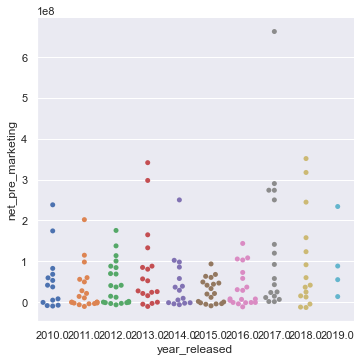

In [107]:
sn.catplot(data=horrortableau, kind="swarm", x="year_released", y="net_pre_marketing")

In [108]:
actiontableau

,Unnamed: 0,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,39,tt0369610,7.00,539338.00,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",34.00,"Jun 12, 2015",215000000.00,652270625.00,1648854864.00,1433854864.00,0.40,6.67,2015.00,True
1,50,tt0401729,6.60,241792.00,John Carter,2012,132.00,"Action,Adventure,Sci-Fi",14.00,"Mar 9, 2012",275000000.00,73058679.00,282778100.00,7778100.00,0.26,0.03,2012.00,False
2,68,tt0429493,6.80,235256.00,The A-Team,2010,117.00,"Action,Adventure,Thriller",32.00,"Jun 11, 2010",110000000.00,77222099.00,177241171.00,67241171.00,0.44,0.61,2010.00,False
3,72,tt0433035,7.10,283534.00,Real Steel,2011,127.00,"Action,Drama,Family",31.00,"Oct 7, 2011",110000000.00,85463309.00,263880341.00,153880341.00,0.32,1.40,2011.00,True
4,78,tt0437086,7.50,88207.00,Alita: Battle Angel,2019,122.00,"Action,Adventure,Sci-Fi",24.00,"Feb 14, 2019",170000000.00,85710210.00,402976036.00,232976036.00,0.21,1.37,2019.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,45547,tt5013056,7.90,466580.00,Dunkirk,2017,106.00,"Action,Drama,History",69.00,"Jul 21, 2017",150000000.00,190068280.00,499837368.00,349837368.00,0.38,2.33,2017.00,True
194,46167,tt5095030,7.10,244024.00,Ant-Man and the Wasp,2018,118.00,"Action,Adventure,Comedy",41.00,"Jul 6, 2018",130000000.00,216648740.00,623144660.00,493144660.00,0.35,3.79,2018.00,True
195,48760,tt5463162,7.80,391735.00,Deadpool 2,2018,119.00,"Action,Adventure,Comedy",15.00,"May 18, 2018",110000000.00,324591735.00,786680557.00,676680557.00,0.41,6.15,2018.00,True
196,50822,tt5758778,5.80,81193.00,Skyscraper,2018,102.00,"Action,Adventure,Thriller",78.00,"Jul 13, 2018",125000000.00,68420120.00,304115534.00,179115534.00,0.22,1.43,2018.00,True


In [178]:
actiontableau.describe()

,Unnamed: 0,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,ec_ratio,year_released
count,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00,198.00
mean,12462.44,6.61,285928.74,2014.24,120.39,48.36,145031313.13,156654379.29,455717593.41,310686280.28,0.34,2.03,2014.26
std,14322.68,0.86,239172.65,2.66,16.48,29.39,58526644.80,135017351.34,354045340.57,322698404.43,0.11,1.80,2.67
min,39.00,4.10,12642.00,2010.00,82.00,1.00,70000000.00,8005980.00,19665004.00,-200237650.00,0.11,-0.72,2010.00
25%,1218.75,6.00,133954.75,2012.00,107.00,24.00,100000000.00,61509443.00,208771966.00,71746961.25,0.27,0.69,2012.00
50%,5069.50,6.60,217295.00,2014.00,119.00,44.50,130000000.00,110356618.00,346967692.00,217061664.50,0.33,1.67,2014.00
75%,20638.50,7.20,386770.50,2016.00,132.00,73.50,175000000.00,205485088.25,622647592.25,449117171.25,0.41,3.05,2017.00
max,56025.00,8.80,1841066.00,2019.00,172.00,100.00,410600000.00,700059566.00,2048134200.00,1748134200.00,0.70,9.72,2019.00


In [164]:
import matplotlib.colors as mcolors

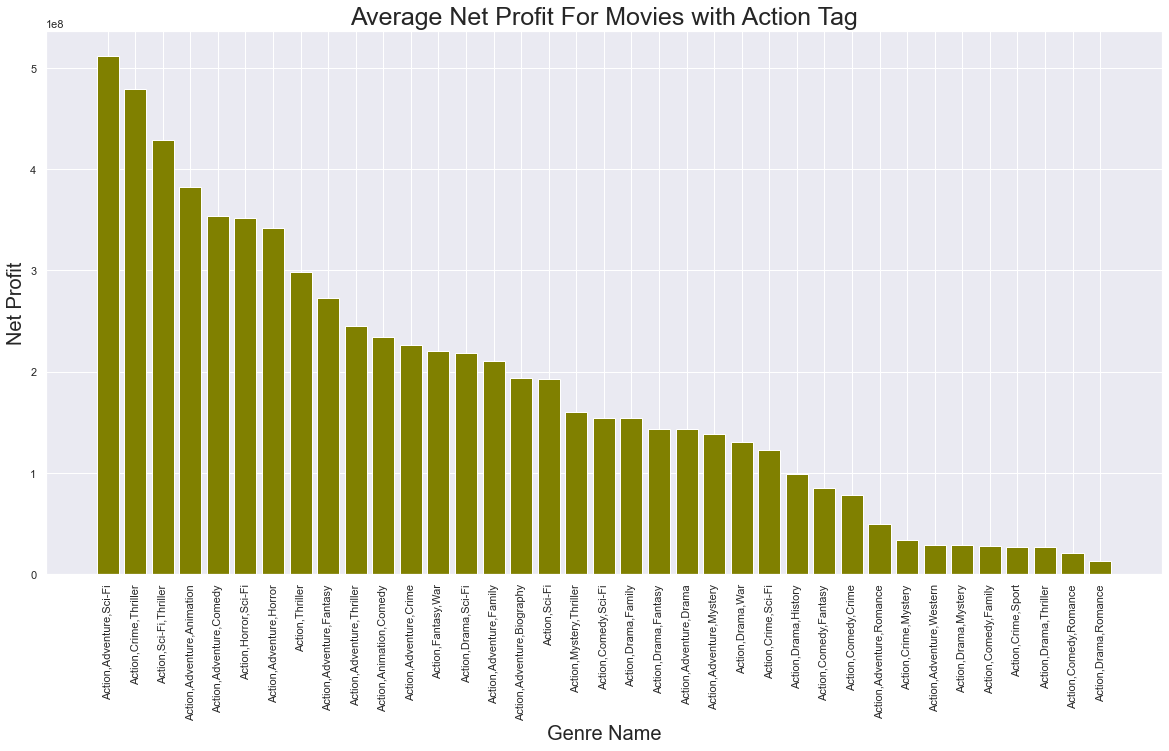

In [144]:
avgnet_profit_action=dict(actiontableau.groupby('genres').net_pre_marketing.mean())
sorted_data = sorted(avgnet_profit_action.items(), key=lambda x: x[1], reverse=True)
avgnet_profit_action_sorted =dict(sorted_data)
avgnet_profit_action_sorted
plot_two_, plot_two_ax_= plt.subplots(figsize=(20, 10))
plot_two_ax_.bar(avgnet_profit_action_sorted.keys(),avgnet_profit_action_sorted.values(), color = 'olive')
plot_two_ax_.set_title('Average Net Profit For Movies with Action Tag', fontsize=25)
plot_two_ax_.set_ylabel('Net Profit', fontsize=20)
plot_two_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90);

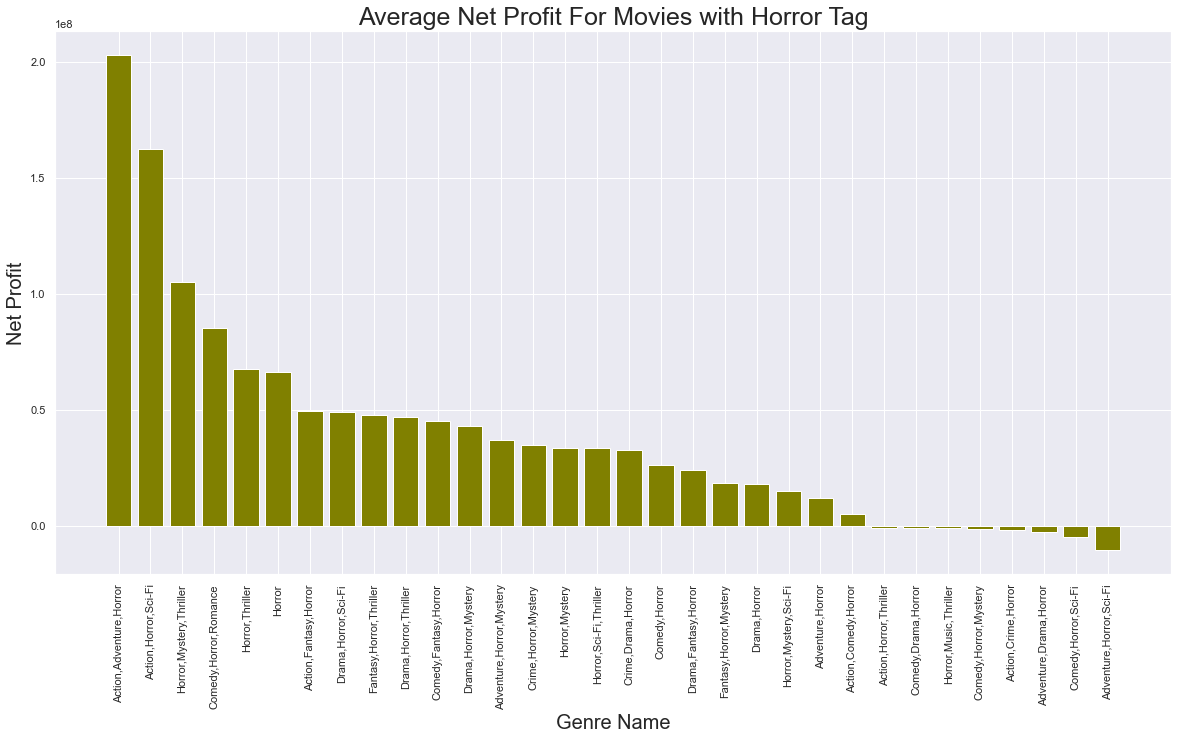

In [145]:
avgnet_profit_horror=dict(horrortableau.groupby('genres').net_pre_marketing.mean())
sorted_data2 = sorted(avgnet_profit_horror.items(), key=lambda x: x[1], reverse=True)
avgnet_profit_horror_sorted =dict(sorted_data2)
avgnet_profit_horror_sorted
plot_three_, plot_three_ax_= plt.subplots(figsize=(20, 10))
plot_three_ax_.bar(avgnet_profit_horror_sorted.keys(),avgnet_profit_horror_sorted.values(), color = 'olive')
plot_three_ax_.set_title('Average Net Profit For Movies with Horror Tag', fontsize=25)
plot_three_ax_.set_ylabel('Net Profit', fontsize=20)
plot_three_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90);


In [132]:
horrortableau = horrortableau.rename(columns = {'earnings/cost_ratio': 'ec_ratio'})
actiontableau = actiontableau.rename(columns = {'earnings/cost_ratio': 'ec_ratio'})

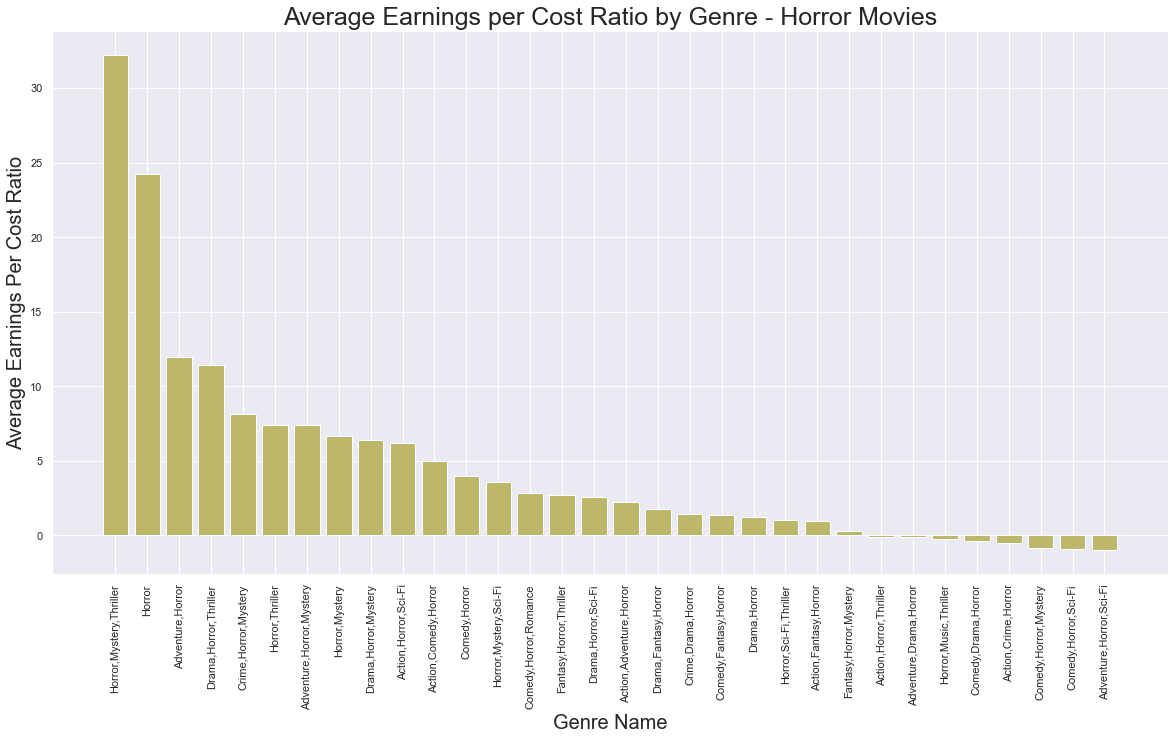

In [147]:
avgnet_ec_horror=dict(horrortableau.groupby('genres').ec_ratio.mean())
sorted_data3 = sorted(avgnet_ec_horror.items(), key=lambda x: x[1], reverse=True)
avgnet_ec_horror_sorted =dict(sorted_data3)
avgnet_ec_horror_sorted
plot_three1_, plot_three1_ax_= plt.subplots(figsize=(20, 10))
plot_three1_ax_.bar(avgnet_ec_horror_sorted.keys(),avgnet_ec_horror_sorted.values(), color = 'darkkhaki')
plot_three1_ax_.set_title('Average Earnings per Cost Ratio by Genre - Horror Movies', fontsize=25)
plot_three1_ax_.set_ylabel('Average Earnings Per Cost Ratio', fontsize=20)
plot_three1_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90);

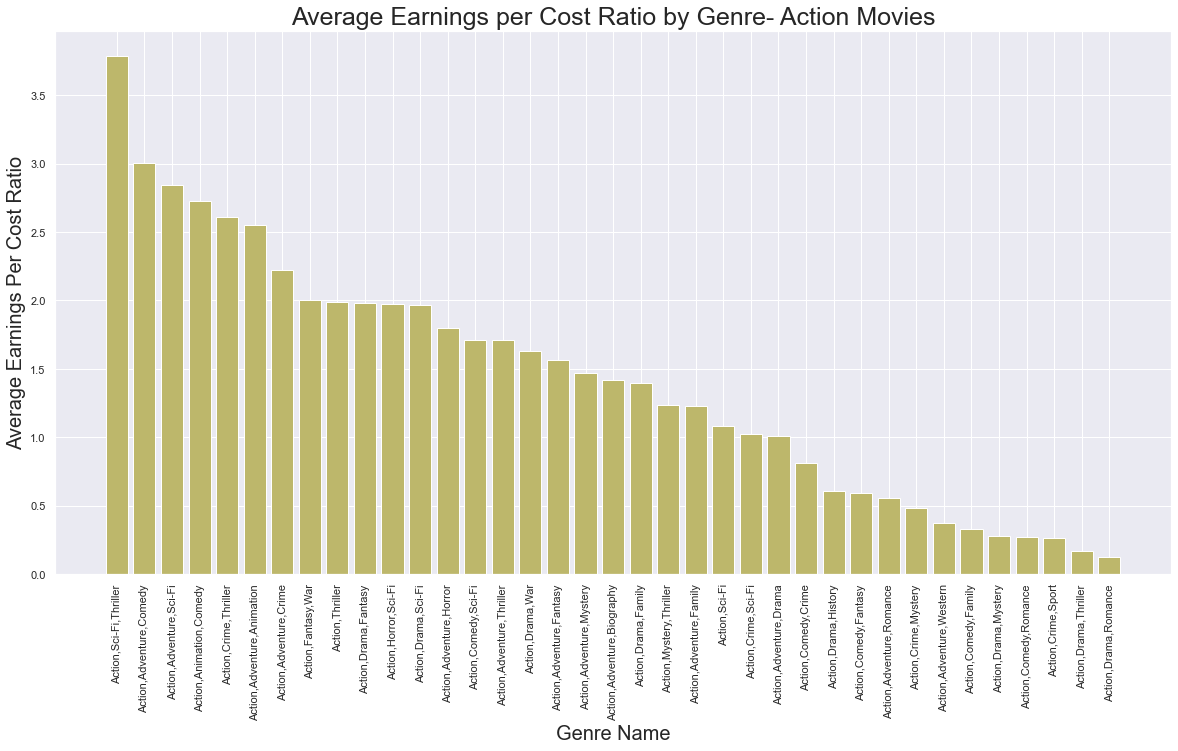

In [154]:
avgnet_ec_action=dict(actiontableau.groupby('genres').ec_ratio.mean())
sorted_data4 = sorted(avgnet_ec_action.items(), key=lambda x: x[1], reverse=True)
avgnet_ec_action_sorted =dict(sorted_data4)
avgnet_ec_action_sorted
plot_three2_, plot_three2_ax_= plt.subplots(figsize=(20, 10))
plot_three2_ax_.bar(avgnet_ec_action_sorted.keys(),avgnet_ec_action_sorted.values(), color = 'darkkhaki')
plot_three2_ax_.set_title('Average Earnings per Cost Ratio by Genre- Action Movies', fontsize=25)
plot_three2_ax_.set_ylabel('Average Earnings Per Cost Ratio', fontsize=20)
plot_three2_ax_.set_xlabel('Genre Name', fontsize=20)

plt.xticks(rotation=90);

In [ ]:
horrortableau.desribe()

In [ ]:
firstq_horrortableau=horrortableau.loc[horrortableau['production_budget']<=4000000]
len(firstq_horrortableau)

In [ ]:
len(firstq_horrortableau.loc[firstq_horrortableau['ec_ratio']>=1])

In [ ]:
len(firstq_horrortableau.loc[firstq_horrortableau['ec_ratio']>=1])/len(firstq_horrortableau)

In [ ]:
secondq_horrortableau=horrortableau.loc[(horrortableau['production_budget']>4000000) & (horrortableau['production_budget']<=9450000.00)]
secondq_horrortableau

In [ ]:
len(secondq_horrortableau.loc[secondq_horrortableau['ec_ratio']>=1])/len(secondq_horrortableau)

In [ ]:
thirdq_horrortableau=horrortableau.loc[(horrortableau['production_budget']<=20000000.00) & (horrortableau['production_budget']>9450000.00)]
len(thirdq_horrortableau)

In [ ]:
len(thirdq_horrortableau.loc[thirdq_horrortableau['ec_ratio']>=1])/len(thirdq_horrortableau)

In [114]:
fourthq_horrortableau=horrortableau.loc[horrortableau['production_budget']>20000000.0]
len(fourthq_horrortableau)

40

In [115]:
len(fourthq_horrortableau.loc[fourthq_horrortableau['ec_ratio']>=1])/len(fourthq_horrortableau)

0.575

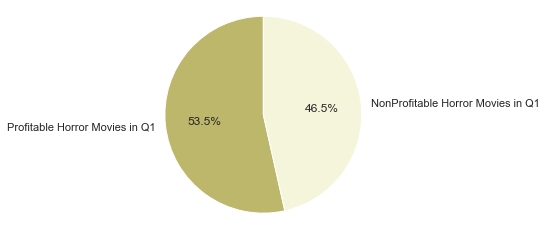

In [171]:
labels = 'Profitable Horror Movies in Q1','NonProfitable Horror Movies in Q1'
sizes = [53.5, 46.5]
explode = (0, 0)  
colors = ['darkkhaki', 'beige']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal');

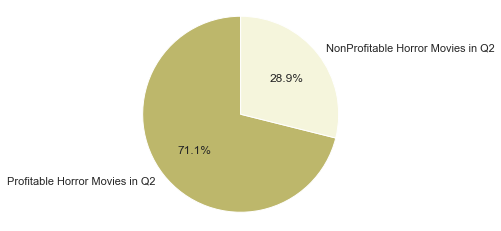

In [170]:
labels = 'Profitable Horror Movies in Q2','NonProfitable Horror Movies in Q2'
sizes = [71.1, 28.9]
explode = (0, 0) 
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal');

(-1.1034107539315117,
 1.1062751839405605,
 -1.1058943837298956,
 1.10028072017316)

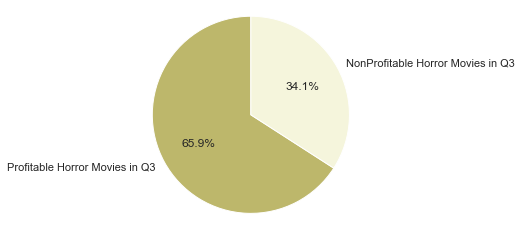

In [172]:
labels = 'Profitable Horror Movies in Q3','NonProfitable Horror Movies in Q3'
sizes = [65.9, 34.1]
explode = (0, 0) 
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors )
ax1.axis('equal')

(-1.1108612289744122,
 1.126493713400557,
 -1.1029140472264491,
 1.1001387641536404)

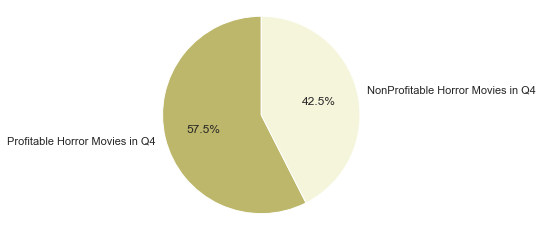

In [173]:
labels = 'Profitable Horror Movies in Q4','NonProfitable Horror Movies in Q4'
sizes = [57.5, 42.5]
explode = (0, 0)  
colors = ['darkkhaki', 'beige']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')